Text(0.5, 1.0, 'LP Model Forward Prediction')

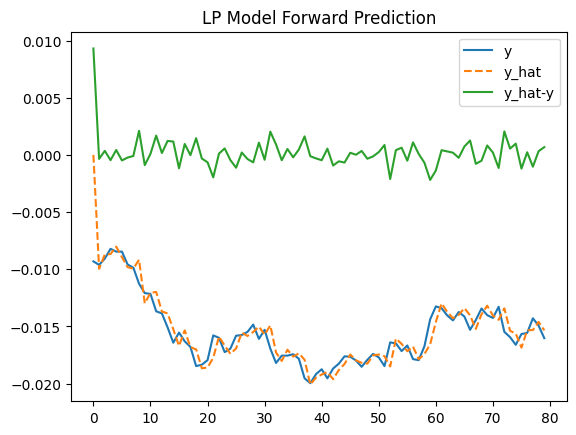

In [5]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import librosa
import soundfile
y, sr = soundfile.read("61-70968-0000.flac")
sr = 16000
y = y[0:80]
a = librosa.lpc(y, order=10)
b = np.hstack([[0], -1 * a[1:]])
y_hat = scipy.signal.lfilter(b, [1], y)
soundfile.write('61-70968-0000_lpc.wav', y_hat, sr)
fig, ax = plt.subplots()
ax.plot(y)
ax.plot(y_hat, linestyle='--')
ax.plot(y_hat-y)
ax.legend(['y', 'y_hat', 'y_hat-y'])
ax.set_title('LP Model Forward Prediction')

/tmp/ipykernel_4145860/3341037949.py:14: FutureWarning: Pass order=8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  lpc_coeffs = librosa.lpc(y, lpc_order)


LPC系数为： [ 1.         -1.5058538   1.0227847  -0.740879    0.4728518  -0.26157147
  0.15515319 -0.16209097  0.08106237]
LPC滤波器的极点为： [-2.18905381+0.j         -0.4459663 +0.46231106j -0.4459663 -0.46231106j
  0.04651856+0.67147268j  0.04651856-0.67147268j  0.46844471+0.37934671j
  0.46844471-0.37934671j  0.5452061 +0.j        ]
LPC滤波器的零点为： []


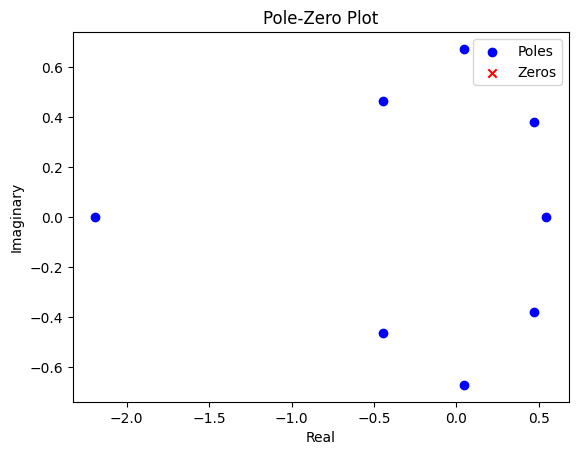

In [2]:
## 音频共振峰并画图
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

# 读取音频文件
y, sr = librosa.load("61-70968-0000.flac",sr = None)

# 计算LPC参数
n_fft = 2048
lpc_order = 8
lpc_coeffs = librosa.lpc(y, lpc_order)

print("LPC系数为：", lpc_coeffs)

# 计算LPC滤波器的分母多项式
den_coeffs = np.zeros(lpc_order + 1)
den_coeffs[0] = 1
den_coeffs[1:] = -lpc_coeffs[1:]

# 计算滤波器的极点和零点
z, p, k = signal.tf2zpk([1], den_coeffs)

print("LPC滤波器的极点为：", p)
print("LPC滤波器的零点为：", z)

# 绘制极点和零点的散点图
fig, ax = plt.subplots()
ax.scatter(p.real, p.imag, marker='o', color='blue', label='Poles')
ax.scatter(z.real, z.imag, marker='x', color='red', label='Zeros')
ax.set_title('Pole-Zero Plot')
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.legend()
plt.show()

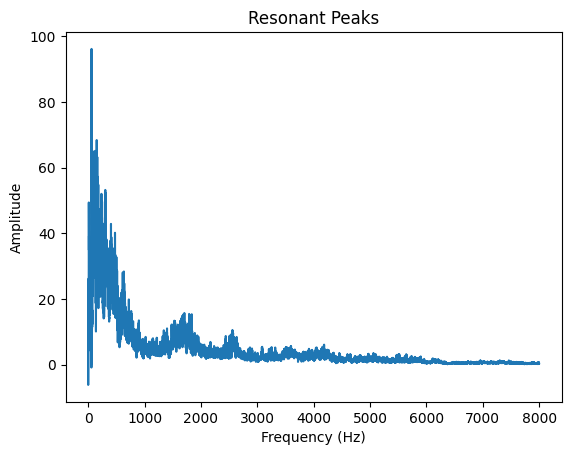

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks,savgol_filter

# 导入音频文件
data,sample_rate = librosa.load("61-70968-0000.flac",sr = None)

# 计算快速傅里叶变换
fft = np.fft.fft(data)
freqs = np.fft.fftfreq(len(data), 1/sample_rate)

# 找到共振峰
peaks, _ = find_peaks(np.abs(fft), height=500)
peak_freqs = freqs[peaks]

# 使用Savitzky-Golay滤波器平滑曲线
smoothed = savgol_filter(np.abs(fft), 51, 10)

# 绘制共振峰曲线
plt.plot(freqs[freqs>0], smoothed[freqs>0])
plt.plot(peak_freqs, smoothed[peaks], 'x')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Resonant Peaks')
plt.show()

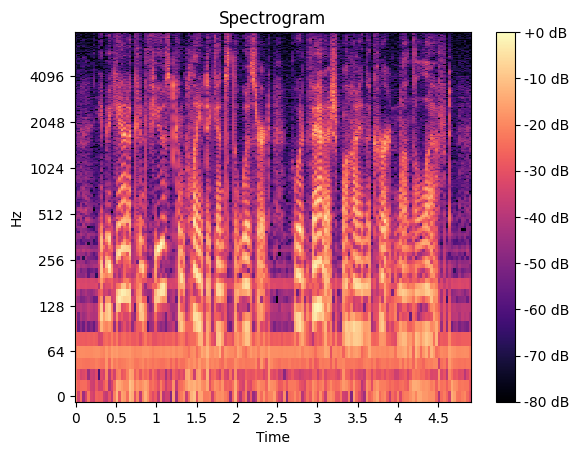

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 导入音频文件
data,sample_rate = librosa.load("61-70968-0000.flac",sr = None)
# 计算短时傅里叶变换
n_fft = 1024
hop_length = 512
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# 将幅度谱转换为分贝值
magnitude_db = librosa.amplitude_to_db(abs(D), ref=np.max)

# 绘制频谱图
librosa.display.specshow(magnitude_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

Text(0.5, 1.0, 'LP Model Forward Prediction')

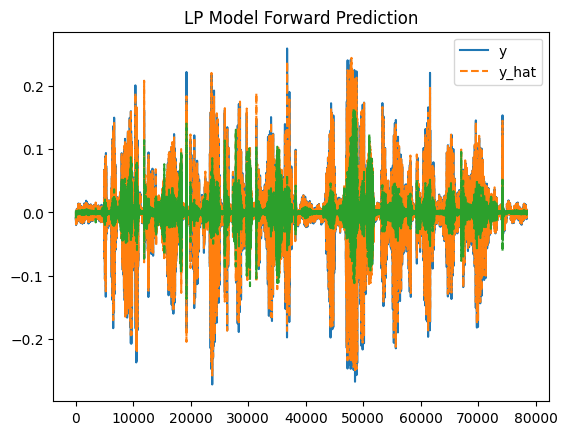

In [6]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import librosa
import soundfile
y1, sr = soundfile.read("61-70968-0000.flac")
y2, sr = soundfile.read("61-70968-0000_lpc.wav")
fig, ax = plt.subplots()
ax.plot(y1)
ax.plot(y2, linestyle='--')
ax.plot(y1-y2, linestyle='--')
ax.legend(['y', 'y_hat'])
ax.set_title('LP Model Forward Prediction')